In [27]:
import torch
import torch.nn as nn
import torch.functional as F
import math
import pandas as pd
import os
import  torch.optim as optim

d_model = 32#QKV空间维度
n_head = 8#头个数   

#配置文档
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 2332030,      # Your seed number, you can pick your lucky number. :)
    'select_all': False,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 20000,     # Number of epochs.            
    'batch_size': 256, 
    'learning_rate': 1e-3,              
    'early_stop': 600,    # If model has not improved for this many consecutive epochs, stop training.     
    'save_path': './models/model.ckpt'  # Your model will be saved here.
}



input_dim = 32
class My_Model(nn.Module):
    def __init__(self, input_dim):
        super(My_Model,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim,input_dim),
            nn.ReLU()
        )
        self.attention = nn.MultiheadAttention(embed_dim=32,num_heads=1)
        self.out = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        x = self.model(x)
        query = x
        key = x
        value = x
        x,attention_weights = self.attention(query, key, value)
        #x = self.relu(self.out(x))
        #x = x.squeeze(1)
        return x




a=torch.Tensor(pd.read_excel("/mnt/home/jiangfengrui/Code/MLP/data1.xlsx").values)
a=(a-torch.mean(a))/torch.std(a)
#b= b.view(4,250,32) #reshape
net = My_Model(input_dim)
output = net(a)
print(output.shape,attention_weights)

torch.Size([1999, 32]) tensor([[0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        ...,
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005]],
       grad_fn=<SqueezeBackward1>)


In [7]:
output = output.view(1000,32)
output = output.detach().numpy()
df = pd.DataFrame(output)
df.to_excel('matrix.xlsx', index=False)

根据矩阵值绘制色块图

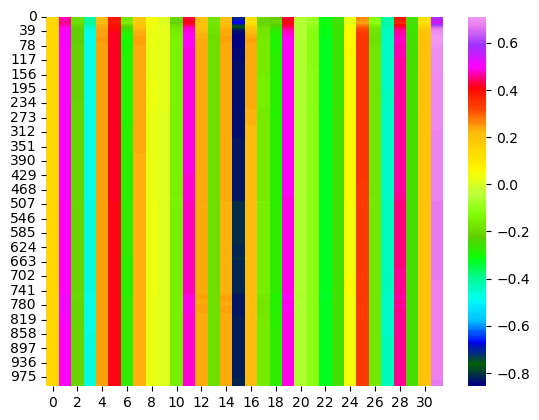

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_plot = sns.heatmap(output,center=0,cmap='gist_ncar')
#plt.imshow(output,cmap=('gray'))

torch.Size([1999, 32])
torch.Size([1999, 1999])


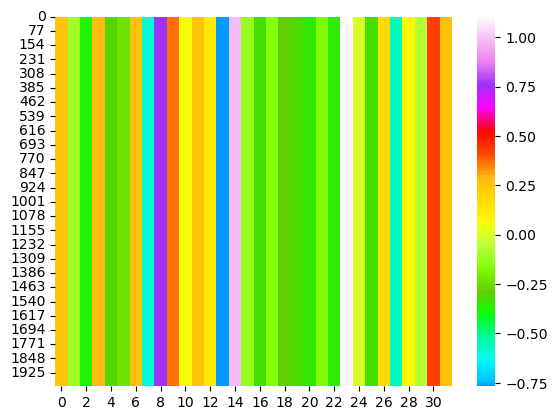

In [19]:

import torch
from torch import nn
import pandas as pd

a=torch.Tensor(pd.read_excel("/mnt/home/jiangfengrui/Code/MLP/data1.xlsx").values)
a=(a-torch.mean(a))/torch.std(a)
# 假设我们有一些查询、键和值的嵌入
query = a  # (batch_size, num_queries, embedding_dim)
key = value = query  # 在这个例子中，我们使用相同的query, key, value
 
# 实例化多头注意力层
attention = nn.MultiheadAttention(embed_dim=32, num_heads=1)
 
# 通过多头注意力层传递查询
output, attention_weights = attention(query, key, value)
 
# 输出的形状应该为 (batch_size, num_queries, embedding_dim)
print(output.shape)
# 注意力权重的形状应该为 (batch_size, num_heads, num_queries, num_queries)
print(attention_weights.shape)
import matplotlib.pyplot as plt
import seaborn as sns
output = output.detach().numpy()
heatmap_plot = sns.heatmap(output,center=0,cmap='gist_ncar')